In [67]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from numpy import clip
from skimage import img_as_float, img_as_ubyte, io
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2yuv, yuv2rgb, rgb2gray

In [ ]:
def entropy(img):
    frcy = np.array([0 for i in range(256)])
    for row in img:
        for px in row:
            frcy[px] += 1
            
    n = len(img) * len(img[0])
    frcy = frcy / n
    ent = -np.sum([p * np.log2(p) for p in frcy if p != 0])
    return ent 
def mse(img1, img2):
    tmp = np.sum([(px1 - px2) ** 2 for px1, px2 in zip(img1[:,:], img2[:,:])])
    mse = np.sqrt(tmp / len(img2) / len(img2[0]))
    return mse

18.349437696477732

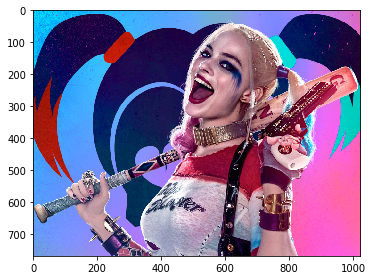

In [77]:
img = imread('13.jpg')
image = img_as_float(img)

imshow(img)

img_yuv = rgb2yuv(image)

7.5857181130279407

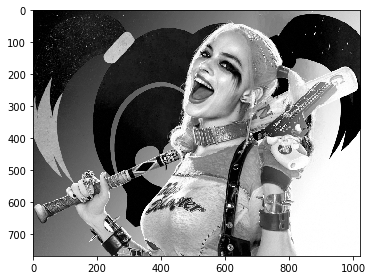

In [69]:
gray = img[:, :,0]
io.imshow(gray)
io.imsave('gray.png', gray)
entropy(gray)

1.0619118254326652

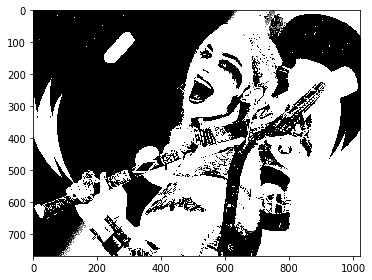

In [70]:
low = img_as_ubyte(gray)
for i in low: 
    for l in range(len(i)): 
        if 127 > i[l] > 0: 
            i[l] = 0 
        elif 255 > i[l] > 128: 
            i[l] = 255 
io.imsave('grayl.jpg', low)
io.imshow(low)
entropy(low)

In [78]:
img_yuv = rgb2yuv(image)

In [79]:
def decim(img, k):
    img = np.array(img, dtype="float")
    y, u, v = img[..., 0], img[..., 1], img[..., 2] 
    new_u = np.array([np.array([px for j, px in enumerate(row) if j % 2])
        for i, row in enumerate(u) if i % 2])
    new_v = np.array([np.array([px for j, px in enumerate(row) if j % 2])
        for i, row in enumerate(v) if i % 2])
    new_u = np.array(np.repeat([np.repeat([px for px in row], 2) for row in new_u], 2, axis=0))
    new_v = np.array(np.repeat([np.repeat([px for px in row], 2) for row in new_v], 2, axis=0))
    new_img = np.dstack((y, new_u, new_v))
    return new_img


In [80]:
img2 = decim(img_yuv, 1)

C:\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


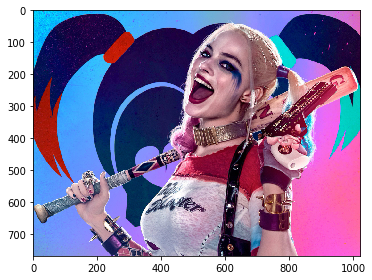

In [83]:
decoded = yuv2rgb(img2)
decoded = np.clip(decoded, 0, 1)
io.imsave('dec.png', decoded)
imshow(decoded)

In [82]:
mse(image, decoded)

0.038583401505217836